# <img style="float: left; padding-right: 10px; width: 150px" src="../../_UNITBV_ADS_2019/unitbv2.png"> SIIPA2020- Știința Explorării și Exploatării Datelor - ADS1  






## <center>Curs 7 - Regresie: exemple</center>
**Universitatea Transilvania**<br>
**Semestrul I, 2020-2021**<br>
**Instructor:** Conf. univ. dr. Teodor &Scedil;tefan B&icirc;ldea<br>
**Contact:** teodor.bildea@unitbv.ro<br>


## Scop didactic

La sfârșitul acestui laborator ați:
* Recapitulat `numpy` includsivg vectori 2-D și cum se pot manipula
* Folosit `scikit-learn` pentru a pregăti datele pentru antrenarea/testare unui model
* Folosit `matplotlib, seaborn, plotly` să faceți grafice
* Făcut câteva exemple și ați înțeles regresia liniară simplă modelată în `scikit-learn` 
* Făcut câteva exemple și ați înțeles kNN  - metoda celor mai apropiați $k$ vecini ($k$ nearest neighbors)

### Array Slicing (recapitulare)

Vectorii Numpy arrays pot fi feliați și parcurși prin bucle. Mai jos este o schemă care ilustrează felierea matricilor bidimensionale.

 <img src="images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>
 

Observați că sintaxa de feliere a listei funcționează în continuare!  
`array[2:,3]` înseamnă " din vector, ia de la linia 2 pâna a sfârșit, și coloana 3]"  
`array[3,:]` înseamnă " din vector, ia linia 3  și toate coloanele]"  

<a class="anchor" id="iloc"></a>
### Pandas Slicing (recapitulare)

`.iloc` e pozițional (poziția e unică), `.loc` e pentru valori/etichete (care nu mai sunt neaparat unice)

In [36]:
# import cast dataframe 
df = pd.read_csv('CarPrice_Assignment.csv', encoding='utf_8')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# get me rows 10 to 13 (python slicing style : exclusive of end) 
df.iloc[10:13]

In [ ]:
# get me columns 0 to 2 but all rows - use head()
df.iloc[:, 0:2].head()

In [ ]:
# get me rows 10 to 13 AND only columns 0 to 2
df.iloc[10:13, 0:2]

In [ ]:
# COMPARE: get me rows 10 to 13 (pandas slicing style : inclusive of end)
df.loc[10:13]

In [ ]:
# give me columns 'year' and 'type' by label but only for rows 5 to 10
df.loc[5:10,['year','type']]

#### Un alt exemplu de poziționare cu `.iloc` and `loc`

Uită-te la următorul dataframe. Este un exemplu prost, deoarece avem valori duplicat pentru index, dar acest lucru este legal în panda. Este doar o practică proastă și o facem pentru a ilustra diferența dintre poziționarea cu `.iloc` și `loc`. 
Pentru a menține rândurile unice, totuși, pe plan intern, `pandas`are propriul său index pentru dataframe cu valori de la `0` la `2`.

In [37]:
index = ['A', 'Z', 'A']
famous = pd.DataFrame({'Elton': ['singer', 'Candle in the wind', 'male'],
                  'Maraie': ['actress' , 'Do not know', 'female'],
                  'num': np.random.randn(3)}, index=index)
famous

,Elton,Maraie,num
A,singer,actress,0.152557
Z,Candle in the wind,Do not know,0.628541
A,male,female,-0.828903


In [ ]:
# accesarea elementelor prin etichetă poate aduce duplicate!!
famous.loc['A']  # deoarece vrem toate rândurile asta e la fel ca famous.loc['A',:]

In [ ]:
# accesarea elementelor în funcție de poziție este unică - afișează doar un rând
famous.iloc[1]

## Aplicații regresie liniară simplă și multiplă

### 1. Regresie liniară simplă



##### 1.1 Pachetul `sklearn` și pregătirea datelor



Înainte de a lucra cu o problemă „reală”, să discutăm mai multe detalii despre `sklearn`.

`Scikit-learning` este principala bibliotecă de machine-learning din Python. Este formată din multe programe de învățare
care pot învăța modele din date, precum și o mulțime de funcții utilitare, cum ar fi `train_test_split ()`.

Utilizați următoarea linie de cod pentru a adăuga pachetul în codul dvs.:

import sklearn

În `scikit-learning`, un <b>estimator</b> este un obiect Python care implementează metodele` fit (X, y) `și` predict (T) `

Haideți să vedem structura „scikit-learning” necesară pentru a 'potrivi' un model. `fit ()` are întotdeauna două argumente:
`estimator.fit (Xtrain, ytrain)`
Vom lua în considerare doi estimatori în acest laborator: `LinearRegression` și` KNeighborsRegressor`.

Este foarte important să înțelegem că `Xtrain` trebuie să fie sub forma unui dataframe cu fiecare rând corespunzător unui eșantion și fiecare coloană corespunzătoare valorilor caracteristice pentru acel eșantion.

pe de altă parte, `ytrain` este o serie simplă de răspunsuri. Acestea sunt continue pentru problemele de regresie.

![](../../2019-CS109A/content/labs/lab03/images/featurematrix.png)

<!--![](../../2019-CS109A/content/labs/lab03/images/sklearn2.jpg)-->

In [1]:
import numpy as np
import sklearn

In [2]:
import pandas as pd

#încărcăm setul de date cu prețuriimobiliare
df_sample = pd.read_csv("CarPrice_Assignment.csv")
df_sample.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Împărțim setul de date în train/test.

Vom folosi o alegere aleatorie, dar odată aleasă - fixată  prin specificarea parametrului random_state.

Specificarea acestui parametru face posibilă verificarea și reproducerea ulterioară.

In [3]:
#Extragem numele brandului din numele companiei
CompanyName = df_sample['CarName'].apply(lambda x : x.split(' ')[0])
df_sample.insert(3,"CompanyName",CompanyName)
df_sample.drop(['CarName'],axis=1,inplace=True)
df_sample.head()
df_sample.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Corectăm micile greșeli:

In [4]:
df_sample.CompanyName = df_sample.CompanyName.str.lower()

def replace_name(a,b):
    df_sample.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('vw','volkswagen')
replace_name('alfa-romero','alfa-romeo')

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Consum

In [5]:
#Consum

df_sample['fueleconomy'] = (0.55 * df_sample['citympg']) + (0.45 * df_sample['highwaympg'])

Grupăm brandurile în baza prețurilor medii observate

In [6]:
#Grupăm brandurile în baza prețurilor medii observate.

df_sample['price'] = df_sample['price'].astype('int')
temp = df_sample.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df_sample['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df_sample.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [7]:
df_sample.groupby('carsrange')['price'].agg(['max','min'])

,max,min
carsrange,,
Budget,17669,5118
Medium,23875,5195
Highend,45400,16430


Split în set de date de antrenament și test

In [8]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#setare random_state pentru a putea replica spargerea - test 0.2 sau 20% 
traindf, testdf = train_test_split(df_sample, test_size=0.2, random_state=42)
 

Setul de test este 20% din setul total de date; setun de antrenament (training set) - 80% din date.

In [85]:

print("Structura setului initial: {0}".format(df_sample.shape))
print("Structura training dataset is: {0}".format(traindf.shape))
print("Structura test dataset is: {0}".format(testdf.shape))

Structura setului initial: (205, 28)
Structura training dataset is: (25, 12)
Structura test dataset is: (7, 12)


In [10]:
df_sample.dtypes

car_ID                 int64
symboling              int64
CompanyName           object
fueltype              object
aspiration            object
doornumber            object
carbody               object
drivewheel            object
enginelocation        object
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype            object
cylindernumber        object
enginesize             int64
fuelsystem            object
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                  int32
fueleconomy          float64
carsrange           category
dtype: object

In [11]:
y_train = np.array(traindf.price)
X_train = np.array(traindf.horsepower )
X_train = X_train.reshape(X_train.shape[0], 1)

In [12]:
y_test = np.array(testdf.price)
X_test = np.array(testdf.horsepower)
X_test = X_test.reshape(X_test.shape[0], 1)

Să revedem forma pentru datele inițiale, train si test:

In [13]:
df_sample.shape

(205, 28)

In [14]:
y_train.shape, X_train.shape

((164,), (164, 1))

In [15]:
y_test.shape, X_test.shape

((41,), (41, 1))

In [33]:
import pandas_profiling as pp
# forming ProfileReport and save 
# as output.html file 
profile = pp.ProfileReport(traindf) # evitati calculul corelatiilor pentru seturi mari
profile.to_file("traindf.html")

##### 1.2 Antrenare model regresie



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
#cream model linear
regression = LinearRegression()

#fit model
regression.fit(X_train, y_train)

#prognoza cu model
predicted_y = regression.predict(X_test)

#variatia explicata
r2 = regression.score(X_test, y_test)
print(f'R^2 = {r2:.5}')

R^2 = 0.63261


In [18]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.657697534125993
29003054.40181304
20414149.847692315
Coefficients: 
 156.16107557905218 -3126.846516877469


In [32]:

grid = np.linspace(np.min(df_sample.price), np.max(df_sample.price), 100)
xgrid = np.linspace(np.min(df_sample.horsepower), np.max(df_sample.horsepower), 100)

###################################################################################33
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x= y_test, 
               y = predicted_y,mode='markers',
               name = 'Valori reale'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x = grid, y = grid, mode='lines',
               name = 'Diagonala x=y'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=traindf.horsepower, 
               y=traindf.price,mode='markers',
               name = 'Date antrenament'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=testdf.horsepower, 
               y=testdf.price,mode='markers',
               name = 'Date test'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=xgrid, 
               y=regression.predict(xgrid.reshape(100, 1)),mode='lines',
               name = 'Linia de regresie'),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Vizualizare rezultate predicție pe datele de test")

# Update xaxis properties
fig.update_xaxes(title_text="Prețuri mașini", row=1, col=1)
fig.update_xaxes(title_text="Cai putere", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Prețuri prognozate", row=1, col=1)
fig.update_yaxes(title_text="Prețuri mașini",  row=2, col=1)


fig.show()

# Tema de laborator:
    
Incărcați setul de date boston_housing.csv. Cele 14 coloane sunt următoarele:
1. CRIM: rata criminalității pe cap de locuitor pe oraș
2. ZN: proporție de teren rezidențial zonat pentru loturi de peste 25.000 mp.
3. INDUS: proporție de suprafata(acri) de afaceri non-retail pe oraș
4. CHAS: variabila dummy a râului Charles (= 1 dacă traiectul limitează râul; 0 altfel)
5. NOX: concentrație de oxizi azotici (părți la 10 milioane) 
6. RM: numărul mediu de camere pe locuință
7. age: proporția de unități ocupate de proprietari construite înainte de 1940
8. DIS: distanțe ponderate până la cinci centre de angajare din Boston
9. RAD: indicele de accesibilitate la autostrăzile radiale
10. IMPOZIT: impozit pe valoarea integrală \ 10.000 USD
11. PTRATIO: raport elev-profesor în funcție de oraș (numarul de profesori vs numar de elevi)
12. B: 1000 (Bk − 0,63) 2 unde Bk este proporția de negri pe oraș
13. LSTAT:% populație nivel de trai scazut
14. MEDV: Valoarea medie a caselor ocupate de proprietari în mii de dolari$ 

Putem vedea că atributele/predictorii au un amestec de unități

Există 450 de observații.

<div class="exercise"><b>Exercise</b></div>

Folosind fișierul de mai sus, în cele ce urmează veți încerca să preziceți cât mai bine coloana 14-MDEV care conține prețurile caselor. 

Am oferit un set de teste `boston_housing_test.csv`, dar nu vă uitati la fișier până când nu ați finalizat și antrenat un model.

1. Încărcați datele. Formatul e csv. Uitați-vă rapid la un rezumat al datelor pentru a vă familiariza cu acestea și pentru a vă asigura că nimic nu este prea grav (găuri în date, coloane neutilizabile, etc).

2. Utilizați o funcție discutată anterior pentru a partiționa automat datele într-un set de antrenare și validare. Depindeți de dvs. să alegeți cât de mari ar trebui să fie aceste două părți.

3. Din atributele numerice alegeți cel mai bine corelat cu coloana 14 și creați un model de regresie pe datele (cel mai bine corelat -> matricea de corelație - puteți folosi pandas profiling dacă vreți)


In [20]:
# codul vostru aici


# creați splitare în set de train si test


##### 1.5 Compararea modelelor de regresie. Aplicatie: top predictori

#### Putere de predictie individuala: Predictive Residual Sum of Squares

Vom folos in functia de mai jos de mai multe ori regresia liniara simpla pentru a compara puterea predictie a fiecarui atribut in parte in prezicerea pretului - practic, vom prezic pe rand una din observatii pe baza modelelor facut cu toate celelalte inregistrari. 



In [21]:
cars_lr = traindf[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]

In [22]:
cars_lr.dtypes

price                int32
fueltype            object
aspiration          object
carbody             object
drivewheel          object
wheelbase          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
boreratio          float64
horsepower           int64
fueleconomy        float64
carlength          float64
carwidth           float64
carsrange         category
dtype: object

Un mod de a genera numere pentru variabilele categoriale este metod get_dummies.

Metoda din sklearn este la fel de bună și folosită mai ales când vom vorbi despre linii de asamblare (pipelines) pentru antrenare și testare automată (probabil semestrul următor...)

In [23]:
# Funcția care va codifica variabilele categoriale
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


Codificăm variabilele categoriale presupunând (neverificat) existența implictă a unei importanțe ierahice a valorilor.

In [24]:
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('fueltype',cars_lr)

In [25]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'Medium', 'Highend', 'gas'],
      dtype='object')

In [26]:
import numpy as np
from sklearn.model_selection import KFold

   
def cross_validation_score(df, model,k, target, covs = None):
    
    # compute press score:
    res = []
    # split in 10 equal parts for crossvalidation
    kf = KFold(n_splits=k)
    
    
    for train_index, test_index in kf.split(df):
           
        
        X_train = None
        X_test = None
        
        if covs is not None:
            
            X_train = df[covs].iloc[train_index]
            X_test = df[covs].iloc[test_index]
        
        y_train = df[[target]].iloc[train_index]
        y_test = df[[target]].iloc[test_index]
        
        #print('training')
        # train on X_temp
        trained_model = train_model(model, X_train, y_train)
        
        #print(model, trained_model)
        if model == 'base_model':
            trained_model = [trained_model[0]] *len(y_test)
        
        #print(model, trained_model)
#         print('compute error')
#         print()
        # forecast and compute MSE        
        y_hat = forecast(model, trained_model,X_test)
        
        #print(y_test.shape[0],  len(y_hat))
        res.append( np.sum((y_test.values -y_hat )**2)/len(y_test))
        
    return np.mean(res)


# linear regression and base model 
def train_model(model, X,y):
    
    if model == 'base_model':
        
        # just predict using the average of the observed variabile (the one to predict)
        return sum(y.values)/len(y)
    
    else: # linear regression
        
        reg = LinearRegression()
        
        #print(X.values[0:10], y.values[0:10])
        reg.fit(X.values, y.values)
    
        return reg

def forecast(model,trained_model, X):
    
    if model == 'base_model': # base model, i.e. averages
        
        return trained_model # return the average
    
    else: # multilinear regression
        
        return trained_model.predict(X.values)

In [27]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'Medium', 'Highend', 'gas'],
      dtype='object')

In [38]:
# predictorii 
pred_vars = [ 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'Medium', 'Highend', 'gas']

X = cars_lr[pred_vars]

## select a metric to predict
y = cars_lr[['price']] #df_metric[[metric_name]] 

# get prediction power of each columns

dict_list = []
base_model = (np.sum((y-np.mean(y))**2)/len(y)).values[0] #cross_validation_score(cars_lr,'base_model', 10, target = 'price')
print('base model: ',base_model)
for _,col in enumerate(pred_vars):
    individual_press ={}

    individual_press['feature_name'] = col
    individual_press['PRESS'] = cross_validation_score(cars_lr[[col, 'price'] ], 
                                                       'lin-reg', 10, 
                                                       target = 'price',
                                                      covs = [col])#[0][0]
    individual_press['base model'] = base_model
    individual_press['PRESS_pct_diff'] =round(100*(1-individual_press['PRESS']/base_model),1)#[0]),1)
    dict_list.append(individual_press)

individual_press_final = pd.DataFrame(dict_list)


top_features = individual_press_final.sort_values(by = ["PRESS_pct_diff"], ascending = [False])
top_features = top_features.rename(columns = {'PRESS_pct_diff':'Prediction Power'})
top_features

base model:  59637752.81480517


,feature_name,PRESS,base model,Prediction Power
2,enginesize,1.571588e+07,5.963775e+07,73.6
1,curbweight,1.958961e+07,5.963775e+07,67.2
4,horsepower,2.136494e+07,5.963775e+07,64.2
27,Highend,2.474849e+07,5.963775e+07,58.5
7,carwidth,2.725161e+07,5.963775e+07,54.3
5,fueleconomy,3.037516e+07,5.963775e+07,49.1
22,four,3.099811e+07,5.963775e+07,48.0
6,carlength,3.589357e+07,5.963775e+07,39.8
14,rwd,3.689611e+07,5.963775e+07,38.1
13,fwd,3.954887e+07,5.963775e+07,33.7


<a class="anchor" id="sixth-bullet"></a>
## Regresorul kNN - $k$-nearest neighbors

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [87]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [76]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)


Acum, că ești familiarizat cu `sklearn`, ești gata să faci o regresie KNN.  

Regresorul implementat Sklearn `sklearn.neighbors.KNeighborsRegressor`. Parametrul principal este `number of nearest neighbors - numărul vecinilor`. Există alți parametri, cum ar fi metrica distanței (implicită este distanța euclidiană). Pentru o listă cu toți parametrii, consultați fișierul [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Să folosim $5$ vecini.

In [88]:
# Import the library
from sklearn.neighbors import KNeighborsRegressor

In [89]:
# Set number of neighbors
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [90]:
# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.87181


In [80]:
knnreg.predict(X_test)

array([20.14, 14.  , 15.3 , 26.3 , 19.56, 17.06, 16.88])

<div class="exercise"><b>Exercițiu</b></div>

Calculați și afișați scorul $R^{2}$ pe datele de test.

Calculați și afișați scorul $R^{2}$ pe datele de test și pentru un regresor liniar pe aceleași date.

In [81]:
# Your code here

Nu prea e bun scorul? Să variem numărul de vecini și să vedem ce obținem.

In [82]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Make our lives easier by entering the k values from a list
k_list = [1, 2, 4, 15]

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 2: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'),
 4: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'),
 15: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')}


Acum să vizualizăm toate valorile k în același grafic.

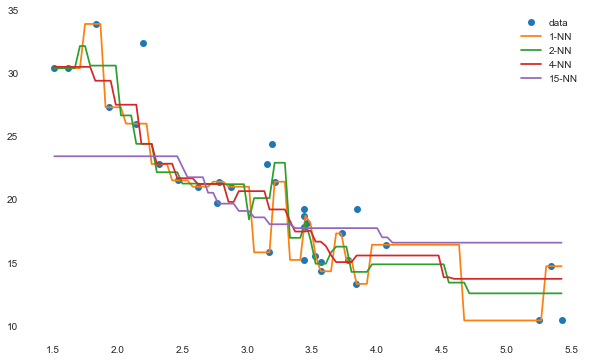

In [84]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

<div class="exercise"><b>Exercițiu</b></div>


Explicați ce vedeți în grafic. **Hint** Observați cum $1$-NN trece prin fiecare punct al setului de antrenament, dar eșuează cu totul în altă parte. 


Să vedem scorurile pe setul de antrenament.

Text(0, 0.5, '$R^{2}$')

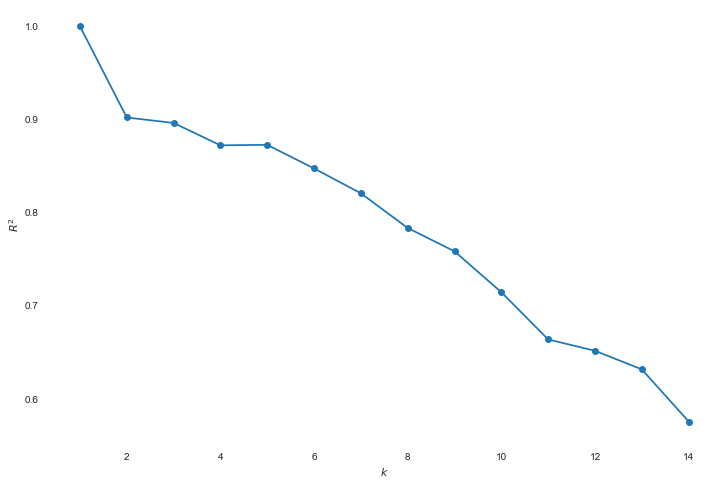

In [70]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

<div class="exercise"><b>Exercițiu</b></div>

* De ce obținem un scor $R^2$  perfect pentru k=1 pentru setul de date de test?
* Faceți același grafic ca mai sus pe setul de date de *test*.
* Care e cel mai bun $k$ in primul grafic? Dar in al doilea?

In [71]:
# Your code here


In [72]:
# %load solutions/knn_regression.py